In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
print(df)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


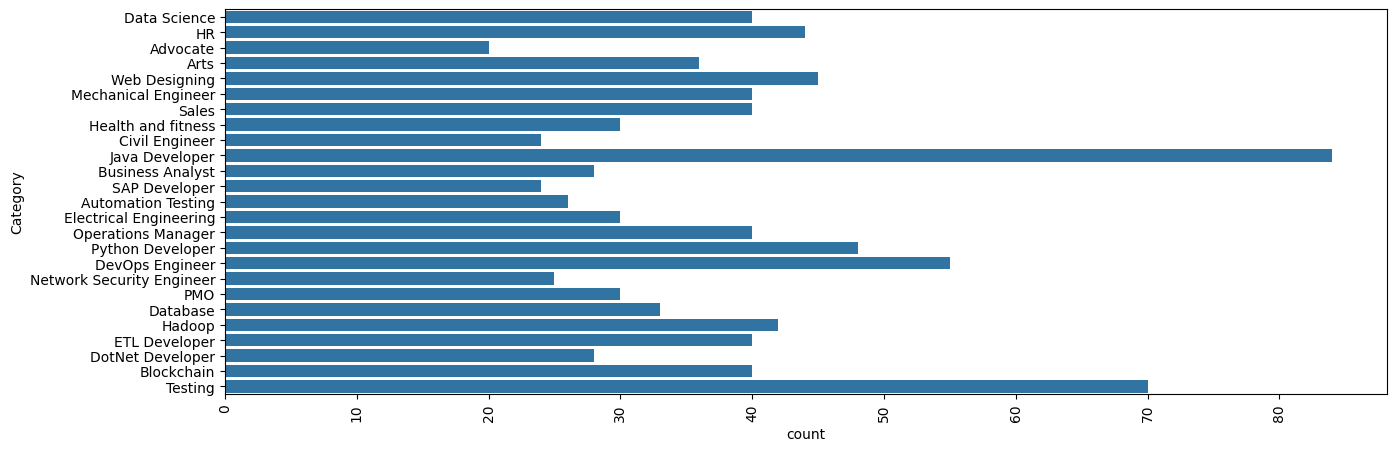

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

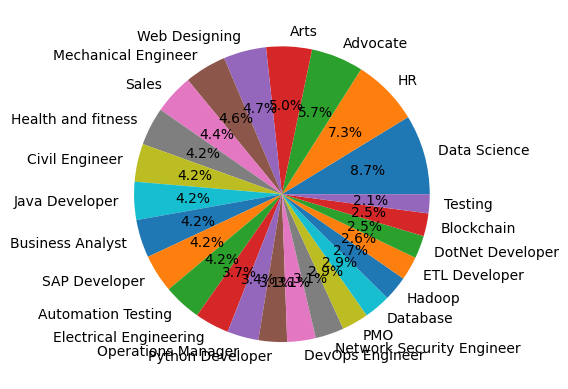

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s*', ' ', txt)  # Remove URLs
    cleanText = re.sub('RT|cc', ' ', cleanText)  # Remove RT and cc
    cleanText = re.sub('#\S+', ' ', cleanText)  # Remove hashtags
    cleanText = re.sub('@\S+', ' ', cleanText)  # Remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # Remove punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # Remove non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText)  # Replace multiple spaces with single space
    return cleanText.strip()  # Remove leading/trailing spaces

In [12]:
dirty_text = "Check my portfolio at http://example.com! #DataScience @user RT: Hello world!"
print(cleanResume(dirty_text))

Check my portfolio at Hello world


In [13]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [16]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive t...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [17]:
print(df['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64


In [18]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df['Resume'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredtext, df['Category'], test_size=0.2, random_state=42)

In [21]:
X_train.shape

(769, 7351)

In [22]:
X_test.shape

(193, 7351)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [24]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [25]:
myresume="""Recent graduate with a strong foundation in Data Science, Machine Learning, and Statistical Analysis.
Passionate about leveraging data-driven insights to solve real-world problems.
 Proficient in Python, SQL, and data visualization tools with hands-on project experience in predictive modeling and data analysis.
 Bachelor of Technology (B.Tech) in Computer Science / Data Science
University Name, City | Year of Graduation
GPA: 3.5/4.0
Relevant Coursework: Machine Learning, Statistics, Data Structures, Database Management

Programming Languages: Python (NumPy, Pandas, Scikit-learn), SQL
Machine Learning: Regression, Classification, Clustering, NLP
Data Visualization: Matplotlib, Seaborn, Tableau, Power BI
Big Data & Databases: SQL, MongoDB (Basics)
Tools & Frameworks: Jupyter Notebook, Git, TensorFlow (Basics)

Predictive Model for House Price Estimation
Developed a linear regression model using Scikit-learn to predict housing prices based on features like area, location, and amenities.

Achieved an R² score of 0.85 after feature engineering and hyperparameter tuning.

Tools: Python, Pandas, Matplotlib

2. Customer Segmentation using Clustering
Applied K-Means clustering to segment customers based on purchasing behavior.

Improved marketing strategy by identifying high-value customer groups.

Tools: Scikit-learn, Seaborn

Internships
Data Science Intern | Wipro, Hyderabad| 15th May-2023

Assisted in data cleaning and preprocessing for a large-scale dataset.

Developed automated reports using Python and Tableau.

Collaborated with the team to implement a recommendation system prototype.
"""

In [26]:
import pickle
clf=pickle.load(open('model.pkl','rb'))
cleaned_Resume = cleanResume(myresume)
input_features=tfidf.transform([cleaned_Resume])
prediction_id=clf.predict(input_features)[0]
#Map Category ID to category name

category_mapping={
    15:"Java Developer",
    23:"Testing",
    8:"DevOps Engineer",
    20:"Python Developer",
    2:"Hadoop",
    7:"C++",
    3:"Python",
    18:"Ruby on Rails",
    3:"C",
    6:"Data Science"

}
category_name=category_mapping.get(prediction_id,"Unknown")
print("Predicted Category:",category_name)
print(prediction_id)

Predicted Category: Data Science
6
